<a href="https://colab.research.google.com/github/erikaprbwt/toqy_segmentation2/blob/main/toqy_segmentation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/toqy.xlsx")
df.head()

,user_pseudo_id,Sum of engagement_time_msec,Sum of event_value_in_usd,frequency_buying_product,x1,x2,x3
0,97087a714235da4f8e06138a0aafbe55,23940685,14929152,3,2.911717,38.553385,15.919295
1,23ef23dc9b2f469ed63ec5db1c1acda0,13225140,11122814,2,1.293688,28.706050,10.587626
2,3546e07e1415b13e4b2b6d278648a806,6762185,8345597,2,0.317792,21.521144,10.587626
3,287e409fe1a3ff848fc7266f2e609332,29352642,8345597,3,3.728914,21.521144,15.919295
4,a294a4786ce66b98a3424457a26cfb2f,12044525,8115477,4,1.115417,20.925803,21.250963


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_pseudo_id               9015 non-null   object 
 1   Sum of engagement_time_msec  9015 non-null   int64  
 2   Sum of event_value_in_usd    9015 non-null   int64  
 3   frequency_buying_product     9015 non-null   int64  
 4   x1                           9015 non-null   float64
 5   x2                           9015 non-null   float64
 6   x3                           9015 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 493.1+ KB


In [ ]:
num=['x1','x2','x3']
df.head()

,user_pseudo_id,Sum of engagement_time_msec,Sum of event_value_in_usd,frequency_buying_product,x1,x2,x3
0,97087a714235da4f8e06138a0aafbe55,23940685,14929152,3,2.911717,38.553385,15.919295
1,23ef23dc9b2f469ed63ec5db1c1acda0,13225140,11122814,2,1.293688,28.706050,10.587626
2,3546e07e1415b13e4b2b6d278648a806,6762185,8345597,2,0.317792,21.521144,10.587626
3,287e409fe1a3ff848fc7266f2e609332,29352642,8345597,3,3.728914,21.521144,15.919295
4,a294a4786ce66b98a3424457a26cfb2f,12044525,8115477,4,1.115417,20.925803,21.250963


In [ ]:
df_array=np.array(df[num])
print(df_array)

[[ 2.91171712 38.55338459 15.91929457]
 [ 1.29368762 28.70605047 10.58762625]
 [ 0.31779215 21.52114369 10.58762625]
 ...
 [-0.70328655 -0.06965618 -0.0757104 ]
 [-0.70328655 -0.06965618 -0.0757104 ]
 [-0.70328655 -0.06965618 -0.0757104 ]]


In [ ]:
kmeans=KMeans(n_clusters=5, random_state=123)
kmeans.fit(df[num])

KMeans(n_clusters=5, random_state=123)

In [ ]:
print(kmeans.cluster_centers_)

[[-0.49061617 -0.06965618 -0.0757104 ]
 [ 1.88808192  7.46320056  7.71021794]
 [ 3.19599649 -0.06236633 -0.02444436]
 [ 2.56895043 23.02330507 19.25158727]
 [ 0.80715599 -0.06766878 -0.06041881]]


In [ ]:
print(kmeans.labels_)
df['cluster']=kmeans.labels_
df.head()

[3 3 3 ... 0 0 0]


,user_pseudo_id,Sum of engagement_time_msec,Sum of event_value_in_usd,frequency_buying_product,x1,x2,x3,cluster
0,97087a714235da4f8e06138a0aafbe55,23940685,14929152,3,2.911717,38.553385,15.919295,3
1,23ef23dc9b2f469ed63ec5db1c1acda0,13225140,11122814,2,1.293688,28.706050,10.587626,3
2,3546e07e1415b13e4b2b6d278648a806,6762185,8345597,2,0.317792,21.521144,10.587626,3
3,287e409fe1a3ff848fc7266f2e609332,29352642,8345597,3,3.728914,21.521144,15.919295,3
4,a294a4786ce66b98a3424457a26cfb2f,12044525,8115477,4,1.115417,20.925803,21.250963,3


In [ ]:
df['cluster']=df['cluster'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_pseudo_id               9015 non-null   object 
 1   Sum of engagement_time_msec  9015 non-null   int64  
 2   Sum of event_value_in_usd    9015 non-null   int64  
 3   frequency_buying_product     9015 non-null   int64  
 4   x1                           9015 non-null   float64
 5   x2                           9015 non-null   float64
 6   x3                           9015 non-null   float64
 7   cluster                      9015 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 563.6+ KB


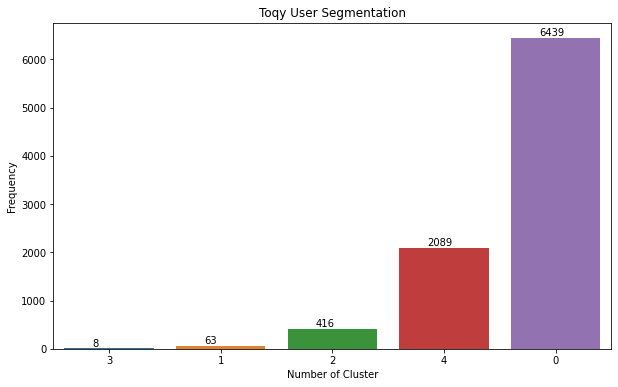

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['cluster'], data=df['cluster'])
plt.title('Toqy User Segmentation')
plt.xlabel('Number of Cluster')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.250, p.get_height()+50))

In [ ]:
df.groupby('cluster')['user_pseudo_id'].count().reset_index()

,cluster,user_pseudo_id
0,0,6439
1,1,63
2,2,416
3,3,8
4,4,2089


In [ ]:
from google.colab import files
df.to_excel('export_toqy.xlsx')
files.download('export_toqy.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>